# Определение успешности компютерной игры

Интернет-магазин «Стримчик»продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
1. Подготовка данных 
1. Исследовательский анализ: 
    1. Сколько игр выпускалось в разные годы
    1. Как менялись продажи по платформам со временем 
    1. Какие платформы лидируют
    1. Определение выборосов
    1. Как влияют на продажи отзывы пользователей и критиков
    1. Общее распределение игр по жанрам 
1. Составление портрета пользователя по регионам
1. Проверка гипотез
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    1. Средние пользовательские рейтинги жанров Action и Sports разные.

## Импорт данных

In [1]:
#Импортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime 
import math
import numpy as np
from math import factorial
from scipy import stats as st
import seaborn as sns

In [2]:
#Читаем данные из файла
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('datasets/games.csv')


In [3]:
#Выводим содержимое и общую информацию
display(data.head(10)) 
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Проверяем наличие явных дубликатов
if data.duplicated().sum() > 0:
    print('Найдено дубликатов:', data.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


Обнаружены следующие проблемы: 
- Некорректное название столбцов
- Есть пропуски в столбцах `name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating `
- Столбец `Year_of_Release` необходимо привести к типу int
- Столбец `User_Score` необходимо привести к типу float64
- Явных дубликатов нет

## Подготовка данных 

### Преобразование названия столбцов

In [5]:
#переименовываем столбцы
data.columns = data.columns.str.lower()
#проверяем резульат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

In [6]:
#приведем типы для столбцов с датами 
data['year_of_release'] = data['year_of_release'].astype('Int64')

В `user_score` приведем к типу `float`. В данном столбце встречается значение `tbd`. Сначала заменим его на NaN, затем обработаем.

In [7]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [8]:
#проверим результат
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заполнение пропусков

Пропуски в столбцах `name` и `genre` скорее всего появились по причине технической ошибки. Но мы оставим без изменений, так как таких строк всего 2.

In [9]:
print(data[(data['genre'].isna() == True) | (data['name'].isna() == True)]  )

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Для столбцов `critic_score` и `user_score` нет какой-либо логичной замены, так как у каких-то игр может не быть данных об оценках критиков и игроков. Оставим эти столбцы как есть.

Пропуски в столбце `year_of_release` оставим без изменений. Так как заполнение данными может исказить результаты. 

Пропуски в столбце `rating` заполним заглушкой. У игры может не быть рейтинга по шкале ESRB, так как эта система используется не во всех регионах.

In [10]:
data['rating'] = data['rating'].fillna('no_rating')

In [11]:
#проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Рассчет суммарных продаж в регионах

Добавим столбец `total_sales`  и заполним его суммой значений по всем регионам для каждой строки.

In [12]:
#добавим столбец total_sales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')

## Исследовательский анализ

### Сколько игр выпускалось в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


Text(0, 0.5, 'Количество игр')

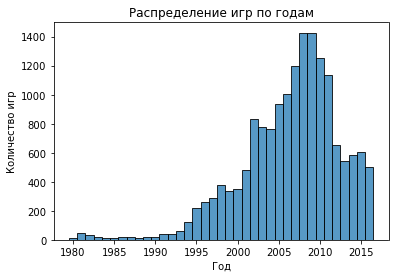

In [13]:
#выведем кол-во выпущенных игр по годам
print(data.groupby('year_of_release')['name'].count())

#построим гистограмму для наглядности
sns.histplot(data = data['year_of_release'],discrete=True )
plt.title('Распределение игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Пик выпуска игр приходится на 2006-2011 года. 

### Как менялись продажи по платформам

Определим платформы с наибольшими суммарными продажами.

In [14]:
#создадим сводную таблицу
platforms_sales = data.pivot_table(index ='platform', values ='total_sales', aggfunc='sum')
#отсортируем данные по количеству продаж
platforms_sales = platforms_sales.sort_values(by='total_sales', ascending=False)
#выведем результат
display(platforms_sales)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Определим список топовых платформ следующим образом: будем сравнивать процентное соотношение продаж. Если отличие менье 50%, то платформа уже не входит в топовые

In [15]:
#объявим пустой массив имен
top_platforms_names = []
#в цикле сравним продажи и или добавим название платформы в цикл, либо добавим последнее полходящее и выйдем из цикла.
for i in range(len(platforms_sales) - 1):
    if platforms_sales.values[i + 1]/ platforms_sales.values[i] >= 0.5:
        top_platforms_names.append(platforms_sales.index[i])
    else: 
        top_platforms_names.append(platforms_sales.index[i])
        break
#выведем результат        
print(top_platforms_names)        

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


Наиболее популярные платформы:
- PS2	
- X360	
- PS3	
- Wii	
- DS	
- PS	

После PS значения становятся меньше более чем в 2 раза.

Построим график продаж по годам для каждой платформы отдельно, чтобы увидеть жизненный цикл.

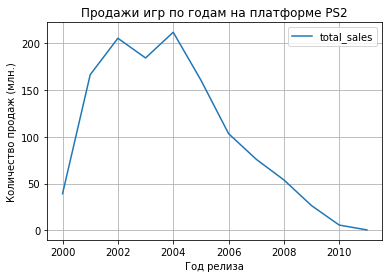

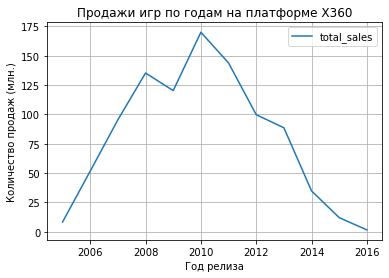

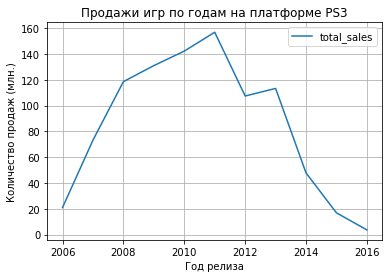

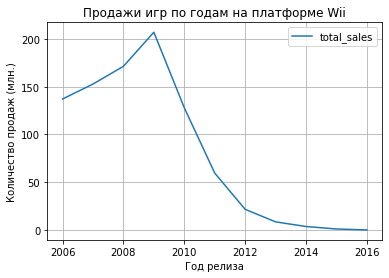

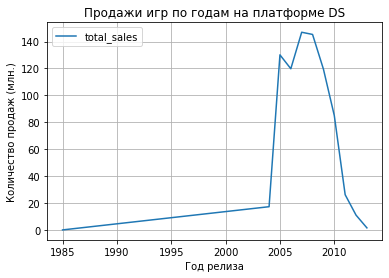

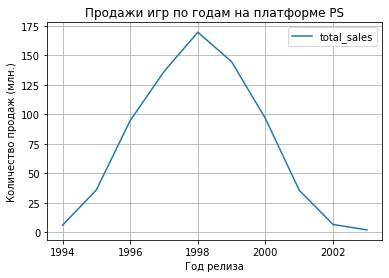

In [18]:
#напишем функцию, которая принимает список названий платформ и строит график продаж дл] каждой платформы
def print_platforms_plots (platforms_names):
    for platform_name in platforms_names: 
        #филтруем данные по выбранной платформе
        platform = data[data['platform'] == platform_name]
        #создаем сводную таблицу и строим график
        platform = platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(grid=True )
        plt.title(f'Продажи игр по годам на платформе {platform_name}' )
        plt.xlabel('Год релиза')
        plt.ylabel('Количество продаж (млн.)')
        
#Вызываем функцию        
print_platforms_plots (top_platforms_names)

In [19]:
#найдем аномальные данные в 1985 г на платформе DS
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Платформа DS была выпущена 2004 году (википедия), значит игры 1985 на ней быть не может. Скорее всего это опечатка. Удалим эту строку. 

In [20]:
#удаляем строку по индексу
data = data.drop(15957)

Теперь рассмотрим все платформы вместе и отобразим их на одном графике. 

In [21]:
#отфильтруем датасет с нужными платформами
top_platforms = data.query('platform in @top_platforms_names')                              

Text(0, 0.5, 'Количество продаж (млн.)')

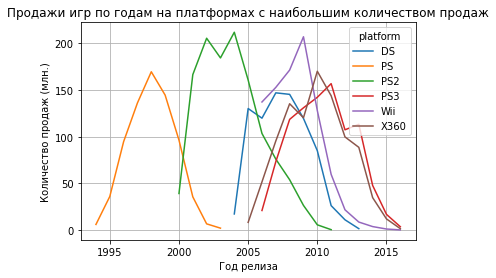

In [22]:
#сгруппируем данные по платформе и году релиза и построим график
top_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True)
plt.title('Продажи игр по годам на платформах с наибольшим количеством продаж' )
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж (млн.)')

- В среднем жизненный цикл платформы составляет 10 лет (от появления, до почти полного прекращения продаж);
- Частота появления новой платформы увеличивается со временем от 9 до 1 года. Частота исчезновения сдвигается пропорционально.

За актуальный период возьмем жизненный цикл платформы - **3 года**

### Какие платформы лидируют по продажам, растут или падают

За актуальный период возьмем 3 года.

In [23]:
#отфильтруем данные
recent_data = data[data['year_of_release'] >= 2014]

Text(0, 0.5, 'Количество продаж (млн.)')

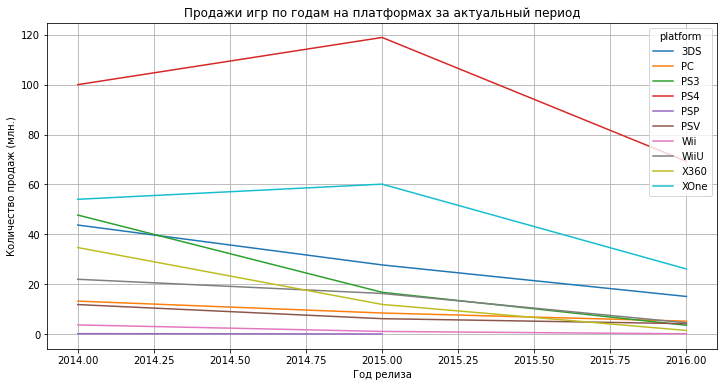

In [24]:
#сгруппируем данные по платформе и году релиза и построим график
recent_data.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True, figsize=(12, 6))
plt.title('Продажи игр по годам на платформах за актуальный период' )
plt.xlabel('Год релиза')
plt.ylabel('Количество продаж (млн.)')


Платформы, у которых возможен рост продаж:
- PS4
- XOne

У линий соответсвующих этим платформам наблюдается не такой резкий спад как у остальных. Данные результаты соответсвуют действительности, эти платформы платформы были самыми популярными в 2017 году.


 ### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим боксплоты по глобальным продажам игр в разбивке по платформам с самыми высокими продажами.

In [25]:
#отфильтруем данные по перспектинвым платформам
new_top_platforms = recent_data.query('platform in ["PS4", "XOne"]')

Text(0, 0.5, 'Количество продаж (млн.)')

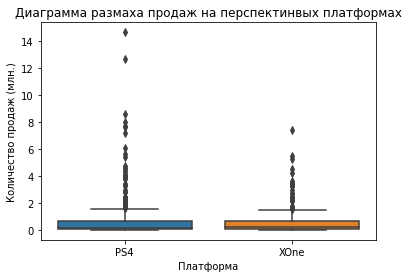

In [26]:
#строим боксплоты
sns.boxplot(data = new_top_platforms, y = 'total_sales', x='platform')
plt.title('Диаграмма размаха продаж на перспектинвых платформах' )
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн.)')

Диаграмма показывает, что для всех платформ есть выбросы в большую сторону. Вероятно, резкое увеличение количества продаж связано с выходами новых игр, инфоповодами.

Построим боксплотны в увеличенном масштабе, чтобы были видны квартили.

Text(0, 0.5, 'Количество продаж (млн.)')

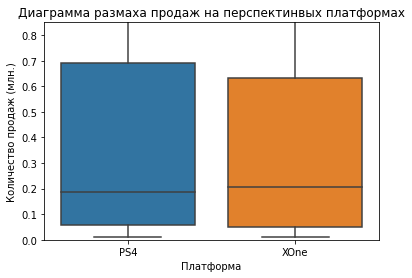

In [27]:
#строим боксплоты
sns.boxplot(data = new_top_platforms, y = 'total_sales', x='platform')
plt.ylim(0, 0.85)
plt.title('Диаграмма размаха продаж на перспектинвых платформах' )
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн.)')

По графику видно, что у платформы `XOne` медиана немного больше. Проверим это, с помощью метода `describe()`

In [28]:
#получим описательные параметры для PS4
new_top_platforms.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [29]:
#получим описательные параметры для XOne
new_top_platforms.query('platform == "XOne"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

Медианные значения по количеству продаж примерно одинаковые. У `XOne` немного больше.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

В качестве популярной платформы возьмем **PS4**

In [30]:
#отфильтруем данные по платформе ps4
popular_platform = recent_data.query('platform == "PS4"') 

Построим диаграмму рассеяния для определения зависимости между продажами и отзывами пользователей/критиков.

Text(0, 0.5, 'Количество продаж (млн.)')

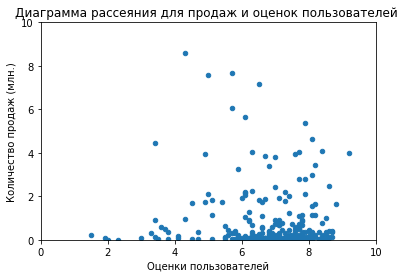

In [31]:
#посторим диаграмму рассеивания для оценок пользователей и количества продаж
popular_platform.plot(x='user_score', y='total_sales', kind='scatter')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей ' )
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж (млн.)')

Text(0, 0.5, 'Количество продаж (млн.)')

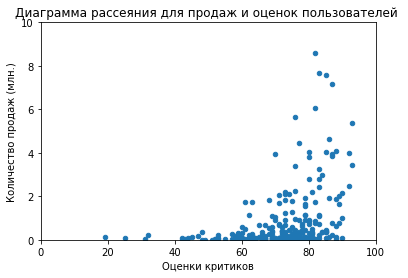

In [32]:
#посторим диаграмму рассеивания для оценок пользователей и количества продаж
popular_platform.plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей ' )
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж (млн.)')

In [33]:
#рассчитаем коэф-т Пирсона между продажами и оценками пользователей и критиков
print(popular_platform['total_sales'].corr(popular_platform['user_score']))
print(popular_platform['total_sales'].corr(popular_platform['critic_score']))

-0.040131589472697356
0.40266141068104083


Диаграммы рассеяния и коэ-фт Пирсона показывают, что зависимость слабая. Для оценок критиков корелляция сильнее.

Проделаем такую же работу для **XOne**

In [34]:
#отфильтруем данные по платформе ps4
popular_platform = recent_data.query('platform == "XOne"') 

Text(0, 0.5, 'Количество продаж (млн.)')

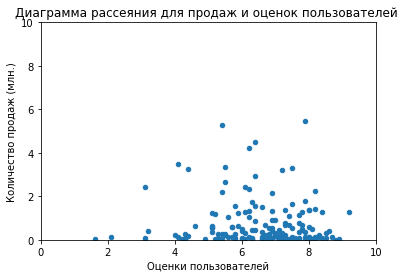

In [35]:
#посторим диаграмму рассеивания для оценок пользователей и количества продаж
popular_platform.plot(x='user_score', y='total_sales', kind='scatter')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей ' )
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж (млн.)')

Text(0, 0.5, 'Количество продаж (млн.)')

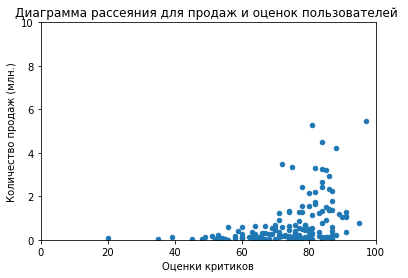

In [36]:
#посторим диаграмму рассеивания для оценок пользователей и количества продаж
popular_platform.plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlim(0, 100)
plt.ylim(0, 10)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей ' )
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж (млн.)')

In [37]:
#рассчитаем коэф-т Пирсона между продажами и оценками пользователей и критиков
print(popular_platform['total_sales'].corr(popular_platform['user_score']))
print(popular_platform['total_sales'].corr(popular_platform['critic_score']))

-0.0703839280647581
0.42867694370333226


Результат почти такой же. Диаграммы рассеяния и коэ-фт Пирсона показывают, что зависимость слабая. Для оценок критиков корелляция сильнее.

### Общее распределение игр по жанрам

Определим наиболее и наимее популярные жанры по продажам.

Text(0, 0.5, 'Количество продаж (млн.)')

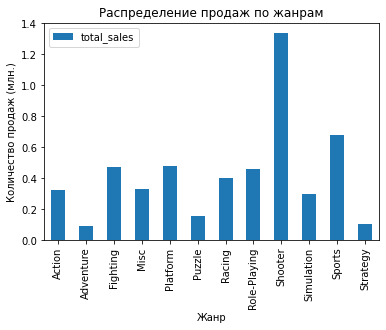

In [38]:
#сгруппируем данные по жанру и построим диаграмму
recent_data.pivot_table(index='genre', values='total_sales').plot(kind='bar')
plt.title('Распределение продаж по жанрам' )
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн.)')

- Самый популярный жанр: `Shooter`. Он сильно выделяется на фоне остальных
- Также популярен жанры `Sports`
- Самые непопулряные: `Strategy` и `Adventure`

## Портрет пользователя каждого региона

### Топ-5 платформ в каждом регионе

Text(0, 0.5, 'Доля продаж')

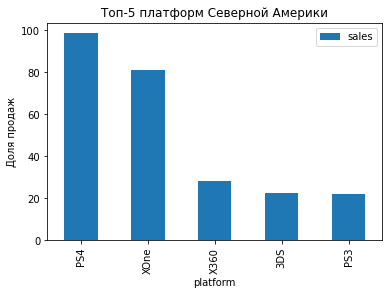

In [39]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 платформ Северной Америки' )
plt.ylabel('Доля продаж')

Text(0, 0.5, 'Доля продаж')

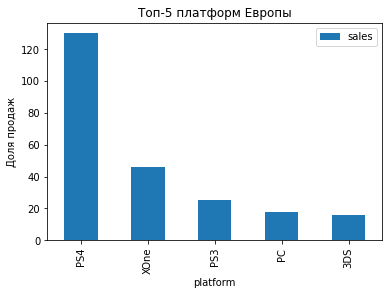

In [40]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 платформ Европы' )
plt.ylabel('Доля продаж')

Text(0, 0.5, 'Доля продаж')

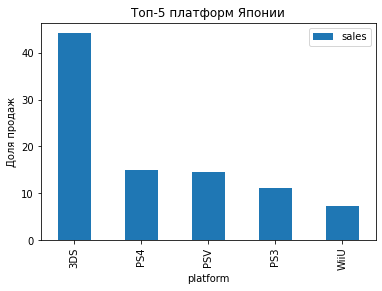

In [41]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 платформ Японии' )
plt.ylabel('Доля продаж')

Результаты показали: cамая популярная платформа в Северной Америке и Европе PS4, в Японии -3DS (Nintendo). 
Это может быть обусловлено следующими факторами: 
1. Для PS4 выпускается больше популярных игр и они хорошо реламируются.
2. В Японии локальный рынок игр и локальные тренды, под них лучше подтстраивается Nintendo. 

### Топ-5 жанров в каждом регионе

Text(0, 0.5, 'Доля продаж')

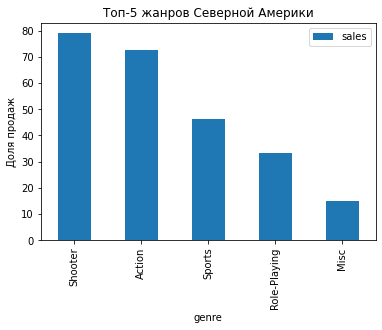

In [42]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 жанров Северной Америки' )
plt.ylabel('Доля продаж')

Text(0, 0.5, 'Доля продаж')

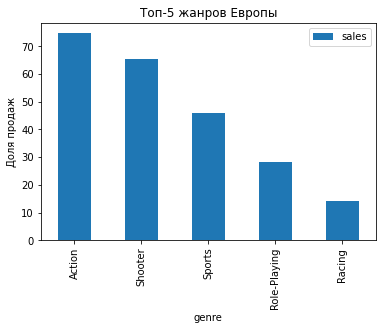

In [43]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 жанров Европы' )
plt.ylabel('Доля продаж')

Text(0, 0.5, 'Доля продаж')

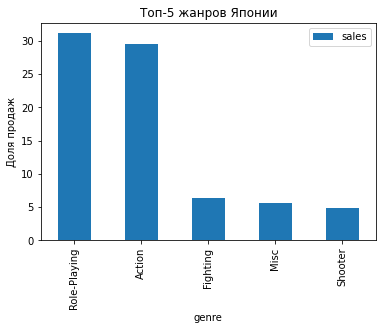

In [44]:
#созданим сводную таблицу
top = recent_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
top.columns = ['sales']

#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Топ-5 жанров Японии' )
plt.ylabel('Доля продаж')

Популярные жанры в США и Европе почти не отличаются. Лидируют `Shooter`, `Action`, `Sports`, `Role-Playing`.  
Однако в Японии лидирует `Role-Playing`. Это может объясняться популярностью игр-новелл и других локальных RPG в Японии. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Для каждого региона сгруппируем данные по рейтингу и посчитаем среднее количество продаж. 

Text(0.5, 0, 'Рейтинг')

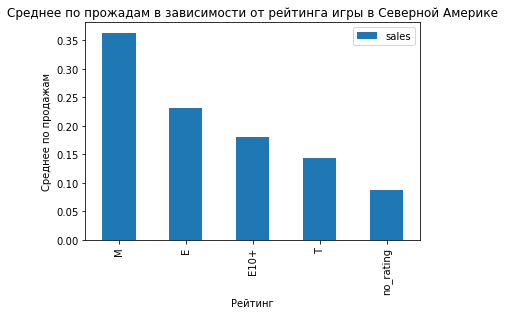

In [45]:
#созданим сводную таблицу
top = recent_data.pivot_table(index='rating', values='na_sales').sort_values(by='na_sales', ascending=False)
top.columns = ['sales']
#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Среднее по прожадам в зависимости от рейтинга игры в Северной Америке')
plt.ylabel('Среднее по продажам')
plt.xlabel('Рейтинг')

Text(0.5, 0, 'Рейтинг')

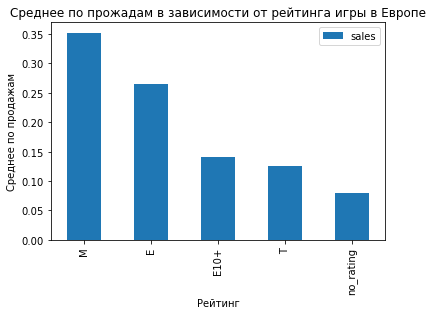

In [46]:
#созданим сводную таблицу
top = recent_data.pivot_table(index='rating', values='eu_sales').sort_values(by='eu_sales', ascending=False)
top.columns = ['sales']
#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Среднее по прожадам в зависимости от рейтинга игры в Европе')
plt.ylabel('Среднее по продажам')
plt.xlabel('Рейтинг')

Text(0.5, 0, 'Рейтинг')

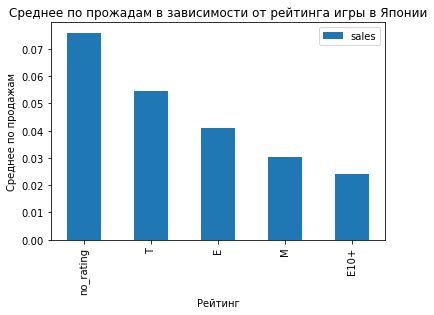

In [47]:
#созданим сводную таблицу
top = recent_data.pivot_table(index='rating', values='jp_sales').sort_values(by='jp_sales', ascending=False)
top.columns = ['sales']
#построим столбчатую диаграмму для наглядности
top.plot(y='sales',kind='bar')
plt.title('Среднее по прожадам в зависимости от рейтинга игры в Японии')
plt.ylabel('Среднее по продажам')
plt.xlabel('Рейтинг')

- В Северной Америке и Европе лучше продаются игры с рейтингом М (mature). Это может быть связано с полулярностью шутеров и экшн-игр. 
- В Японии лидируют игры без рейтинга.  ESRB - это американская система рейтинга. В Японии используюется другая системы, поэтому большинство игр, продаваемых в японии не имеют рейтига ESRB

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:  
**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
**H1:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [48]:
#Зададим пороговое значение
alpha = .05

In [51]:
#Выполняем t-тест. В качестве аргументов возьмем пользовательские рейтинги для соответсвующих платформ
#Используем метод ttest_ind(), так как выборки незхависмые.
results = st.ttest_ind(
    recent_data.query('platform == "XOne" and user_score.notna()', engine='python')['user_score'], 
    recent_data.query('platform == "PC" and user_score.notna()', engine='python')['user_score'], 
    equal_var=False)

#Выводим pvalue
print('pvalue:', results.pvalue)

#Проверяем 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу ") 

pvalue: 0.11601398086668827
Не отвергаем нулевую гипотезу 


Нулевая гипотеза не опровергнута. Вероятность получить равное значение  > 5%. **У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются**

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:  
**H0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые  
**H1:** Средние пользовательские рейтинги жанров Action и Sports разные

In [52]:
#Зададим пороговое значение
alpha = .05

In [54]:
#Выполняем t-тест.  В качестве аргументов возьмем пользовательские рейтинги для соответсвующих жанров
#Используем метод ttest_ind(), так как выборки незхависмые.
results = st.ttest_ind(
    recent_data.query('genre == "Action" and user_score.notna()', engine='python')['user_score'], 
    recent_data.query('genre == "Sports" and user_score.notna()', engine='python')['user_score'], 
    equal_var=False)

#Выводим pvalue
print('pvalue:', results.pvalue)

#Проверяем 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу ") 

pvalue: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Вероятность получить равное значение почти 0. Гипотеза говорит о том, что  **средние пользовательские рейтинги жанров Action и Sports отличаются**

## Вывод

В ходе иссдедования были выявлены следующие критерии, определяющие успешность игры: 

1. **Регион** - необходимо учитывать в каком регионе планируется продавать игру. В заивисимости региона, могут изменяться предпочтения пользователей по платформе и жанру. Например тренды в Японии отличаются от Северной Америки и Европы.
1. **Платформа** - после того, как определили регион распространения игры, необходимо выбрать платформу, популярную в этом регионе. При этом следует сделать ставку на перспективные платформы: на конец 2016г это были `PS4` и `XOne`.
1. **Жанр** - жанры `Shooter`, `Action` и `Role-Playing` входят в топ-5 по во всех регионах. Однако для определения самого популряного жанра, необходимо снова обратить внимание на регион. Например в Евроме и Северной Америке популярнее шутреры, в Японии - рпг.
 
Данные критерии являются необходимыми, но могут не являться достаточными. Однако на них стоит ориентироваться в первую очередь.